In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import PolynomialFeatures

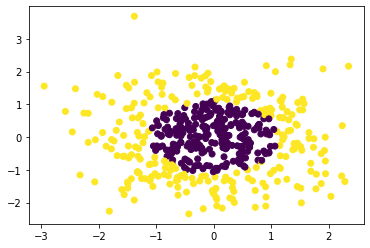

In [3]:
#生成2维正态分布，生成的数据按分位数分为两类，500个样本，2个样本特征
#可以生成两类或多类数据
x_data,y_data = make_gaussian_quantiles(n_samples=500,n_features=2,n_classes=2)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [4]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data,y_data)

LogisticRegression()

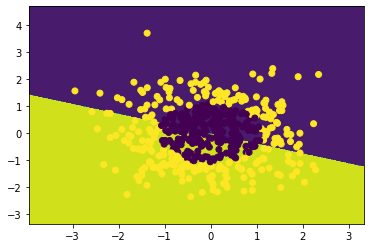

score: 0.526


In [7]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

print('score:',logistic.score(x_data,y_data))

In [8]:
# 定义多项式回归,degree的值可以调节多项式的特征
poly_reg  = PolynomialFeatures(degree=5) 
# 特征处理
x_poly = poly_reg.fit_transform(x_data)
# 定义逻辑回归模型
logistic = linear_model.LogisticRegression()
# 训练模型
logistic.fit(x_poly, y_data)

# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

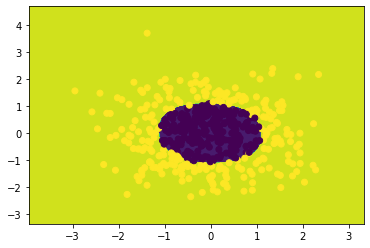

score: 0.986


In [9]:
z = logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

print('score:',logistic.score(x_poly,y_data))